<a href="https://colab.research.google.com/github/Soham2704/Machine-learning/blob/main/houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

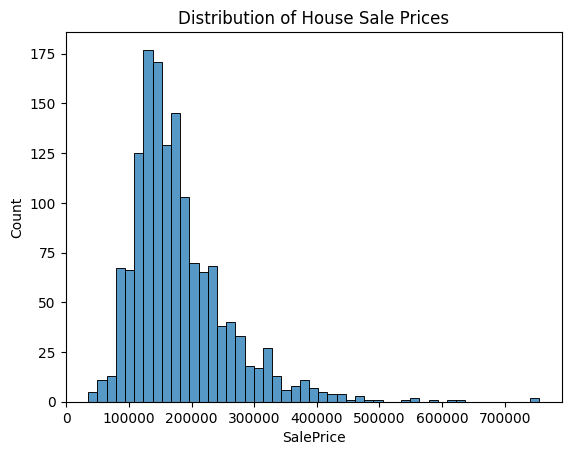

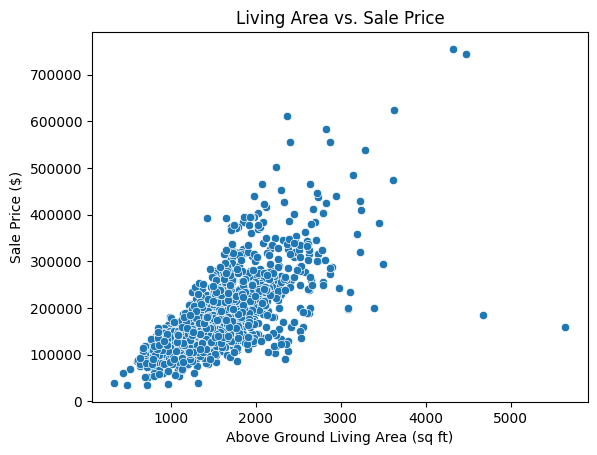

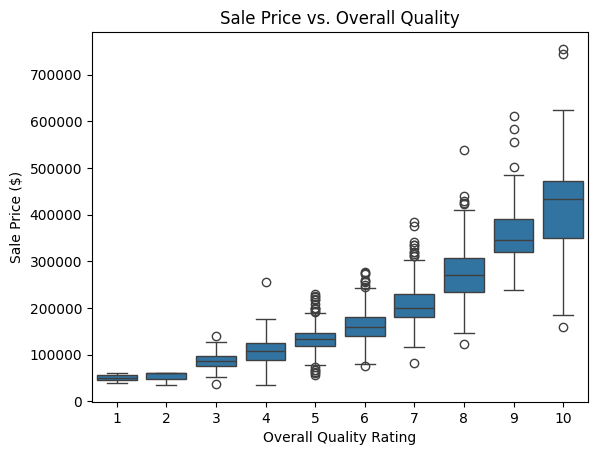

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 272 entries, Id to SaleCondition_Partial
dtypes: bool(234), float64(3), int64(35)
memory usage: 767.2 KB
model training complete
The Root Mean Squared Error (RMSE) of the model is: $28432.34


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

house_df=pd.read_csv('/train (1).csv')



sns.histplot(data=house_df, x='SalePrice')
plt.title('Distribution of House Sale Prices')
plt.show()

sns.scatterplot(data=house_df, x='GrLivArea', y='SalePrice')

plt.title('Living Area vs. Sale Price')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')

plt.show()

sns.boxplot(data=house_df,x='OverallQual', y='SalePrice')

plt.title('Sale Price vs. Overall Quality')
plt.xlabel('Overall Quality Rating')
plt.ylabel('Sale Price ($)')

plt.show()

house_df.drop(columns=['Alley'], inplace=True)
house_df.drop(columns=['MasVnrType'], inplace=True)
house_df.drop(columns=['FireplaceQu'], inplace=True)
house_df.drop(columns=['PoolQC'], inplace=True)
house_df.drop(columns=['Fence'], inplace=True)
house_df.drop(columns=['MiscFeature'], inplace=True)


median_lotfrontage=house_df['LotFrontage'].median()
house_df['LotFrontage']= house_df['LotFrontage'].fillna(median_lotfrontage)


house_df['GarageType'] = house_df['GarageType'].fillna('None')

house_df['GarageFinish'] = house_df['GarageFinish'].fillna('None')

house_df['GarageQual'] = house_df['GarageQual'].fillna('None')

house_df['GarageCond'] = house_df['GarageCond'].fillna('None')

house_df['GarageYrBlt'] = house_df['GarageYrBlt'].fillna(0)

house_df=pd.get_dummies(house_df)
house_df.info()
house_df.head()

for col in house_df.columns:
    if house_df[col].isnull().any():
        house_df[col] = house_df[col].fillna(house_df[col].median())

y=house_df['SalePrice']
X=house_df.drop(columns=['SalePrice'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
print("model training complete")

y_pred=model.predict(X_test)
from sklearn.metrics import mean_squared_error
import numpy as np
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f"The Root Mean Squared Error (RMSE) of the model is: ${rmse:.2f}")
